# Data Wrangling for Instacart recommendation system

## Contents

    1. Introduction
    2. Imports
    3. Data wrangling & Exploratory data analysis
        3.1 Aisles
        3.2 Departments
        3.3 Products
        3.4 Orders
        3.5 Order products prior
        3.6 Order products train
    4. Summary

## 1. Introduction

In this notebook, we explore the data provided in the Instacart Market basket analysis dataset available on Kaggle. Once this notebook is completed, the data should be without missing values and in a format suitable for model building.

## 2. Imports 

In [1]:
#Importing required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

## 3. Exploratory data analysis
There are 6 excel files with different types of data realted to this project. Let us explore each one in detail.

## 3.1 Aisles

In [2]:
aisles=pd.read_csv('../raw_data/aisles.csv')
print(aisles.info())
print("\n\n")
print(aisles)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None



     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]


In [3]:
print(aisles["aisle"].nunique())
print(aisles.isna().sum())

134
aisle_id    0
aisle       0
dtype: int64


### There are 134 different aisles and there is no missing data. The ordering of aisles does not seem to be provide any additional information. 

## 3.2 Departments

In [4]:
departments=pd.read_csv("../raw_data/departments.csv")
print(departments.info())
print("\n\n")
print(departments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None



    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babie

## There are 21 different departments and there is no missing data. The ordering of departments does not seem to be providing any additional information.
    
## There is a missing department (id:21) which might have some interesting information.

## 3.3 Products

In [5]:
products=pd.read_csv("../raw_data/products.csv")
print(products.info())
print("\n\n")
print(products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None



       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49683       49684          Vodka, Triple Distilled, Twist of Vanilla   


In [6]:
products["department_id"].value_counts().sort_values()

10      38
2      548
12     907
8      972
5     1054
18    1081
14    1115
6     1139
21    1258
20    1322
3     1516
4     1684
9     1858
15    2092
17    3085
16    3449
1     4007
7     4365
13    5371
19    6264
11    6563
Name: department_id, dtype: int64

### There is no missing data in the products dataframe. The products are available in all aisles and departments.


Key takeaways:
1. There are very few products in the bulk department which makes sense. 
2. There are quite a few products in the missing department which needs additional analysis
3. There are no repeats in the products. All products are unique

In [7]:
#Products sold in bulk
products.loc[products["department_id"]==10]

,product_id,product_name,aisle_id,department_id
502,503,Wild Rice Blend,68,10
999,1000,Apricots,18,10
5160,5161,Dried Mango,18,10
6193,6194,Organic Red Kidney Beans,68,10
6454,6455,Organic Magic Muesli,68,10
7313,7314,Organic Quick Rolled Oats,68,10
10223,10224,Organic Hunza Golden Raisins,18,10
10539,10540,Whole Medjool Dates,18,10
10914,10915,Organic Short Brown Sprouted Rice,68,10
11324,11325,Organic Hemp Plus Granola,68,10


In [8]:
#Products in missing department
products.loc[products["department_id"]==21]

#print(products.loc[products["department_id"]==21].value_counts())

,product_id,product_name,aisle_id,department_id
37,38,Ultra Antibacterial Dish Liquid,100,21
71,72,Organic Honeycrisp Apples,100,21
109,110,Uncured Turkey Bologna,100,21
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21
49574,49575,Chocolate Vanilla Malt Custard,100,21
49640,49641,"8\"" Pecan Pie",100,21
49663,49664,Lemon Cayenne Drinking Vinegar,100,21


## 3.4 Orders

In [9]:
orders=pd.read_csv("../raw_data/orders.csv")
print(orders.info())
print("\n\n")
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None





,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [10]:
#Checking missing values
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [11]:
#Checking which values are missing
orders.loc[orders["days_since_prior_order"].isna()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
...,...,...,...,...,...,...,...
3420930,969311,206205,prior,1,4,12,NaN
3420934,3189322,206206,prior,1,3,18,NaN
3421002,2166133,206207,prior,1,6,19,NaN
3421019,2227043,206208,prior,1,1,15,NaN


In [12]:
orders.loc[orders["days_since_prior_order"]==0]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
8,2295261,1,prior,9,1,16,0.0
43,2557754,4,prior,5,5,13,0.0
189,2148135,17,prior,30,6,15,0.0
296,965160,24,train,19,0,16,0.0
337,3162630,27,prior,24,2,15,0.0
...,...,...,...,...,...,...,...
3420980,4277,206206,prior,47,2,17,0.0
3420985,648225,206206,prior,52,0,19,0.0
3420991,2475308,206206,prior,58,0,15,0.0
3421001,1043943,206206,test,68,0,20,0.0


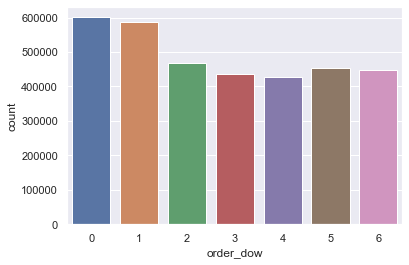

In [13]:
sns.set()
sns.countplot(x=orders["order_dow"])
plt.show()

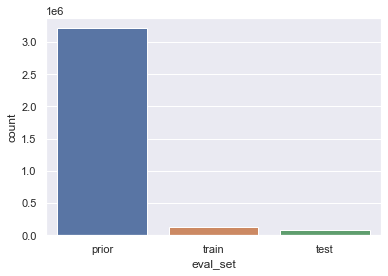

In [14]:
sns.countplot(x=orders["eval_set"])
plt.show()

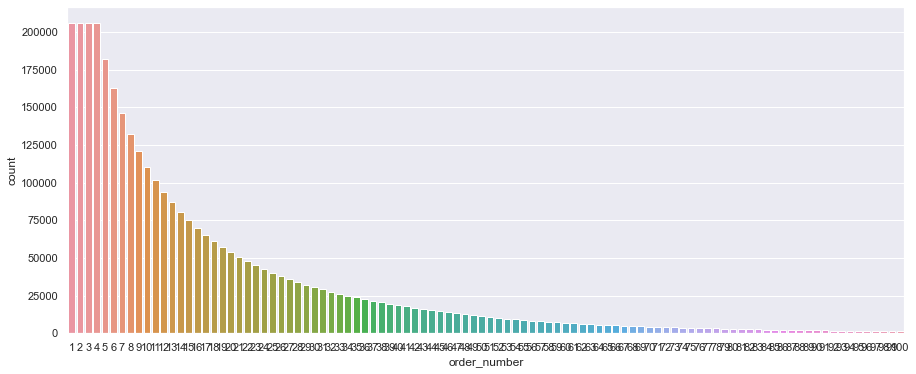

In [15]:
dims = (15, 6)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x=orders["order_number"],ax=ax)
plt.show()

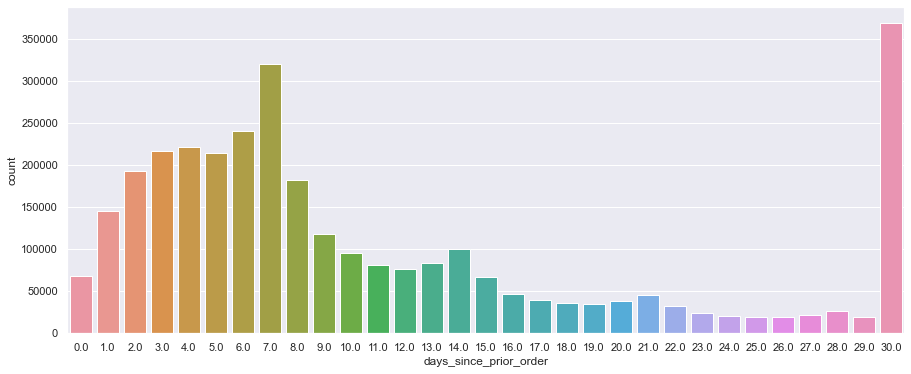

In [16]:
dims = (15, 6)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x=orders["days_since_prior_order"],ax=ax)
plt.show()

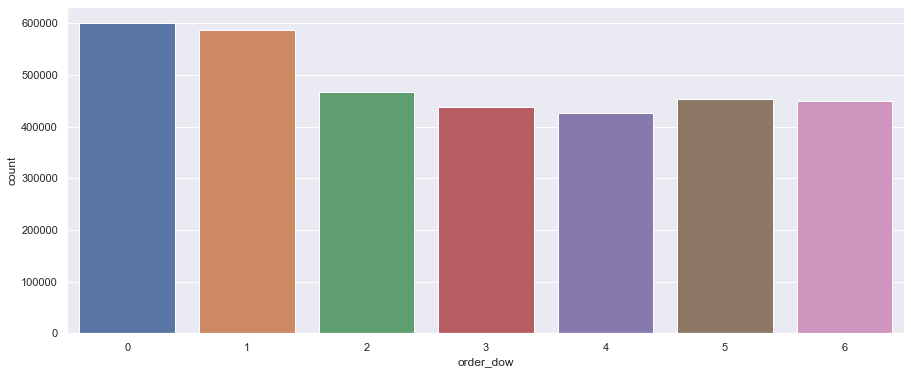

In [17]:
dims = (15, 6)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x=orders["order_dow"],ax=ax)
plt.show()

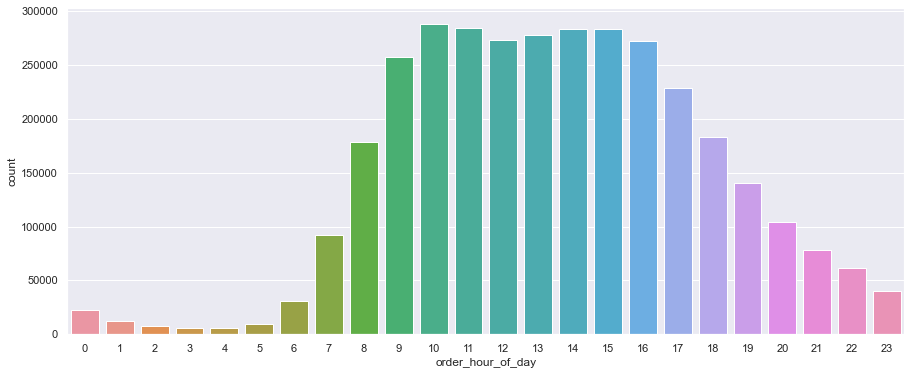

In [18]:
dims = (15, 6)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x=orders["order_hour_of_day"],ax=ax)
plt.show()

<AxesSubplot:>

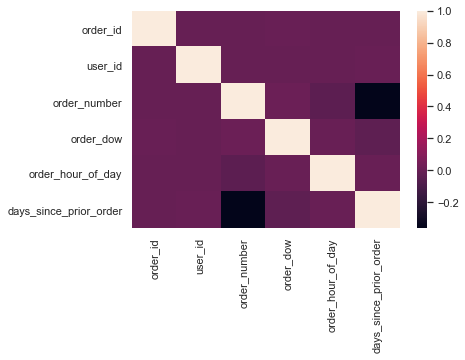

In [19]:
#Plot of correlation among columns
corr=orders.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

There is some negative correlation between order number and days since prior order which makes sense as there will be more orders when the number of days between orders is low.

### The Orders dataframe has the order id, user id, evaluation set, order day of the week, order hour of the day and # of days since previous order.

Key Takeaways
    
1. There are 206,209 unique users in this dataframe
2. Only the first order of each customer has a missing value for # of days since previous order 
3. There are 131,000 orders in the training set and 75,000 orders in the test set.
4. The highest frequency of ordering for a customer is 30 days, followed by an order every 7 days.
5. The orders are uniformly distributed across days and normally distributed across hours.    
6. About 25% of the people have less than 5 orders

## 3.5 Order products prior

In [20]:
order_products_prior = pd.read_csv("../raw_data/order_products__prior.csv")

In [21]:
print(order_products_prior.info())
print("\n\n")
order_products_prior

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB
None





,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


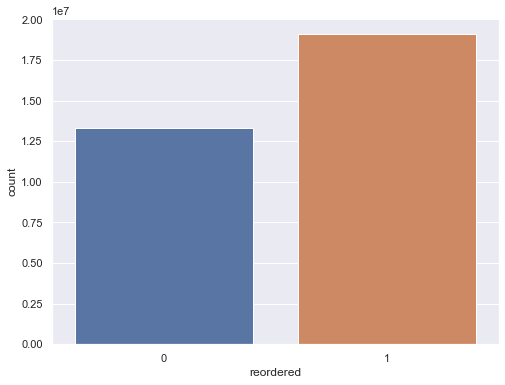

In [22]:
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x=order_products_prior["reordered"],ax=ax)
plt.show()

In [23]:
print("Lowest quantity of items in a cart:",order_products_prior["add_to_cart_order"].min())
print("Highest quantity of items in a cart:",order_products_prior["add_to_cart_order"].max())
print("Median number of items in a cart:",order_products_prior["add_to_cart_order"].median())
print("Mean number of items in a cart:",order_products_prior["add_to_cart_order"].mean())

Lowest quantity of items in a cart: 1
Highest quantity of items in a cart: 145
Median number of items in a cart: 6.0
Mean number of items in a cart: 8.351075517175559


In [24]:
print("Number of unique products ordered: ",order_products_prior["product_id"].nunique())

Number of unique products ordered:  49677


In [25]:
#Checking if orders in orders dataframe matches with orders in order_products_train dataframe
print(set(order_products_prior["order_id"])==set(orders.loc[orders["eval_set"]=="prior"]["order_id"]))

True


In [26]:
#Finding which products were purchased a lot
most_purchased_prior=order_products_prior["product_id"].value_counts()

#plot of most frequent items
top25_prior=most_purchased_prior[:25]
top25_prior=pd.DataFrame(top25_prior)
top25_prior.reset_index(inplace=True)
top25_prior.columns=["product_id","purchased_qty"]
#Let us merge it with products dataframe to find what products were ordered most
top25_prior=top25_prior.merge(products,on="product_id",validate="1:1")
top25_prior.head()

,product_id,purchased_qty,product_name,aisle_id,department_id
0,24852,472565,Banana,24,4
1,13176,379450,Bag of Organic Bananas,24,4
2,21137,264683,Organic Strawberries,24,4
3,21903,241921,Organic Baby Spinach,123,4
4,47209,213584,Organic Hass Avocado,24,4


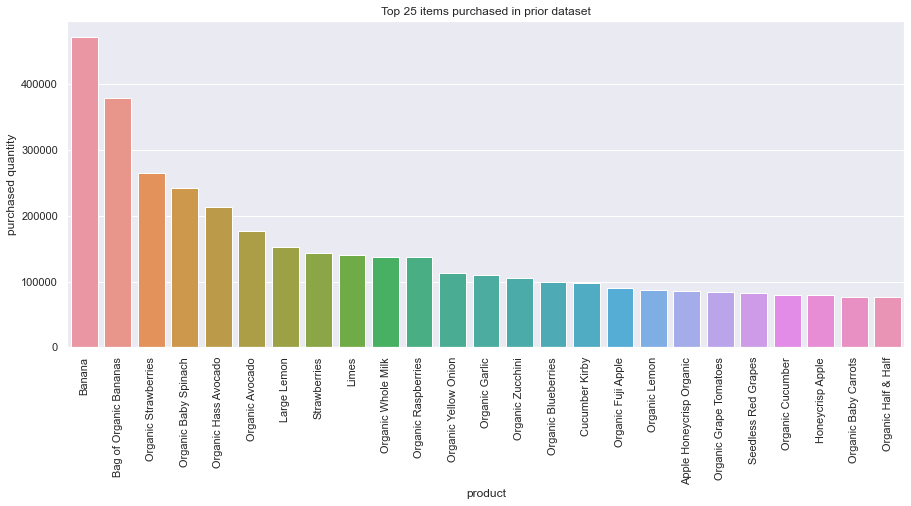

In [27]:
#Plotting in a graph to see how often the items are ordered
dims = (15, 6)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(data=top25_prior,x='product_name',y='purchased_qty',ax=ax)
plt.xlabel("product")
plt.ylabel("purchased quantity")
plt.title("Top 25 items purchased in prior dataset")
plt.xticks(rotation=90)
plt.show()

In [28]:
top25_prior.department_id.value_counts()

4     23
16     2
Name: department_id, dtype: int64

In [29]:
departments.loc[departments["department_id"].isin([4,16])]

,department_id,department
3,4,produce
15,16,dairy eggs


### 23 of the 25 items are from produce department and the remaining are from dairy eggs

### Based on the prior orders, the following observations are made:
    
1. Out of 49688 products iavailable, 49677 have been ordered
2. The maximum number of items in a cart is 145, mean nunmber of items in a cart is 8 and the median is 6
3. The ratio of items re-ordered is about 60%    

## 3.6 Order products train

In [30]:
order_products_train = pd.read_csv("../raw_data/order_products__train.csv")

In [31]:
print(order_products_train.info())
print("\n\n")
order_products_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB
None





,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


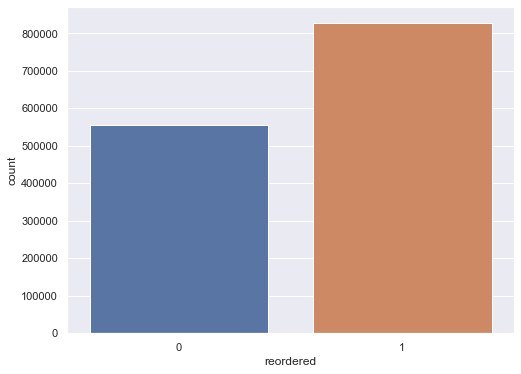

In [32]:
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x=order_products_train["reordered"],ax=ax)
plt.show()

In [33]:
print("Lowest quantity of items in a cart:",order_products_train["add_to_cart_order"].min())
print("Highest quantity of items in a cart:",order_products_train["add_to_cart_order"].max())
print("Median number of items in a cart:",order_products_train["add_to_cart_order"].median())
print("Mean number of items in a cart:",order_products_train["add_to_cart_order"].mean())

Lowest quantity of items in a cart: 1
Highest quantity of items in a cart: 80
Median number of items in a cart: 7.0
Mean number of items in a cart: 8.75804428228167


In [34]:
print("Number of unique products ordered: ",order_products_train["product_id"].nunique())

Number of unique products ordered:  39123


## 4. Summary

In this notebook, we have explored the data present in the different files and gathered some insights on how the customer - product interactions are taking place. The key point here is that we are going to use the prior data as training and training data as the testing datasets for our recommendation problem.